# **TP07 - Análisis de Componentes Principales**

<p align=center>
    <img src="https://github.com/walteraguirre/TPS/blob/main/TP07/imagenes/eja.png?raw=true" alt="ej_a">
</p>

In [30]:
#instalar dependencias
#!pip install tensorflow


### **Visualización de imágenes de la base FASHION-MNIST**

En esta sección se carga la base de datos `FASHION-MNIST` que se utilizará para el posterior análisis del algoritmo de PCA.

El código realiza lo siguiente:

1. **Carga de la base de datos**
   - Se utiliza `fashion_mnist.load_data()` de Keras para cargar el dataset.
   - Este conjunto contiene imágenes de prendas de vestir en escala de grises de tamaño 28×28 píxeles, con un total de 10 clases distintas (etiquetas del 0 al 9).

2. **Asignación de nombres a las clases**
   - Se define una lista `class_names` que traduce los números de las etiquetas a nombres legibles de las prendas. Estos son:
   
   | Etiqueta | Prenda         |
   |----------|----------------|
   | 0        | T-shirt/top    |
   | 1        | Trouser        |
   | 2        | Pullover       |
   | 3        | Dress          |
   | 4        | Coat           |
   | 5        | Sandal         |
   | 6        | Shirt          |
   | 7        | Sneaker        |
   | 8        | Bag            |
   | 9        | Ankle boot     |



3. **Selección aleatoria de imágenes del test**
   - Se eligen 10 imágenes al azar del conjunto de test (`x_test`).
   - Se guardan sus índices y se obtienen sus correspondientes etiquetas (`y_test`).

4. **Visualización**
   - Se usa `matplotlib.pyplot` para mostrar las imágenes seleccionadas.
   - Se crea una grilla de 2 filas y 5 columnas.
   - Debajo de cada imagen se muestra su etiqueta traducida a texto, para facilitar la interpretación visual.




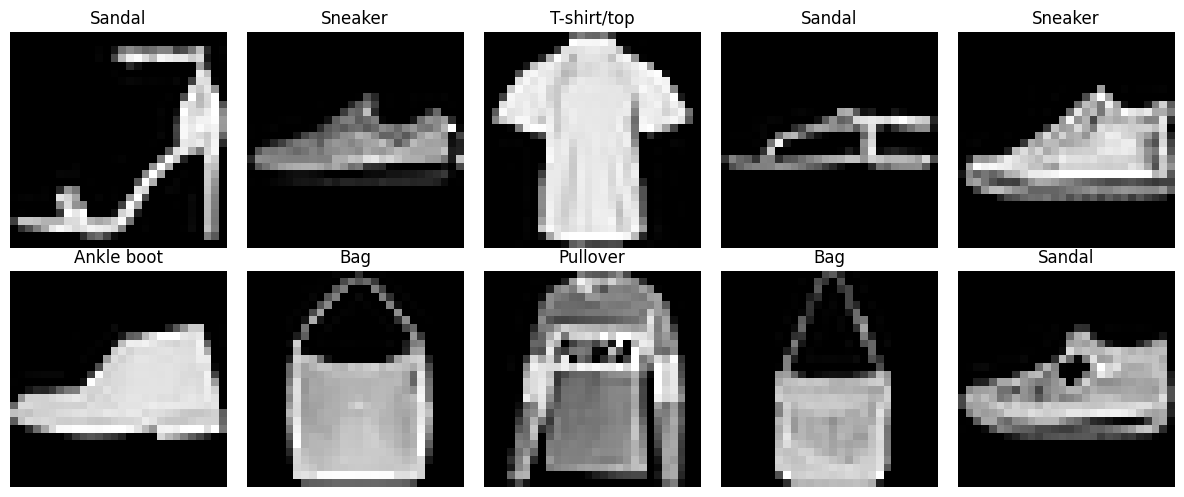

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
from sklearn.metrics import roc_curve, auc


# (1) Cargar la base de datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# (2) Diccionario de etiquetas a nombres de prendas
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# (3) Seleccionar 10 muestras al azar del set de test
indices = np.random.choice(len(x_test), size=10, replace=False)
images = x_test[indices]
labels = y_test[indices]

# (4) Mostrar las imágenes con sus etiquetas
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()


## **Análisis de Componentes Principales (PCA)**

<p align=center>
    <img src="https://github.com/walteraguirre/TPS/blob/main/TP07/imagenes/ej_b.png?raw=true" alt="ej_a">
</p>

---

El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos multivariado, preservando la mayor cantidad de información posible. Se trata de un método ampliamente utilizado en áreas como el procesamiento de señales, análisis de datos y aprendizaje automático.

La motivación principal de PCA es transformar un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables no correlacionadas, denominadas componentes principales, ordenadas de acuerdo con la cantidad de varianza que explican del conjunto de datos original. El primer componente principal es la dirección en el espacio de datos en la que las observaciones presentan la mayor varianza. El segundo componente principal es ortogonal al primero y representa la segunda mayor dirección de varianza, y así sucesivamente.

Matemáticamente, PCA se basa en los conceptos de autovalores y autovectores de la matriz de covarianza de los datos. Para aplicar PCA, los datos deben ser previamente centrados (se resta la media de cada variable), y en muchos casos también escalados (mediante normalización o estandarización), especialmente cuando las variables tienen diferentes unidades o escalas.

Matemáticamente el PCA sigue los siguientes pasos principales:

### Paso 1: Normalizar los datos

Se comienza con la normalización de los datos, es decir, se centra y escala cada variable:

$$
\tilde{x}_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}
$$

donde:

- $\mu_j = \frac{1}{n} \sum_{i=1}^{n} x_j^{(i)}$ es la media de la variable $j$,
- $\sigma_j^2 = \frac{1}{n} \sum_{i=1}^{n} (x_j^{(i)} - \mu_j)^2$ es la varianza de la variable $j$,
- $x_j^{(i)}$ representa el valor de la variable $j$ para la observación $i$,
- $n$ es el número total de observaciones.

### Paso 2: Buscar el primer componente principal

Se busca el vector unitario $\mathbf{v}_1$ que mejor “explique” los datos, resolviendo:

$$
\min_{\|\mathbf{v}_1\|=1} \sum_{i=1}^{n} \bigl\| \tilde{\mathbf{x}}^{(i)} - \alpha_i \mathbf{v}_1 \bigr\|^2
\quad\text{con la condición de ortogonalidad}\quad
\bigl\langle \tilde{\mathbf{x}}^{(i)} - \alpha_i \mathbf{v}_1 , \mathbf{v}_1 \bigr\rangle \;=\; 0.
$$

De la condición de ortogonalidad se obtiene que:

$$
\bigl\langle \tilde{\mathbf{x}}^{(i)} - \alpha_i \mathbf{v}_1 , \mathbf{v}_1 \bigr\rangle \;=\; 0
\;\;\Longrightarrow\;\;
\langle \tilde{\mathbf{x}}^{(i)}, \mathbf{v}_1\rangle \;=\; \alpha_i \|\mathbf{v}_1\|^2 \;=\;\alpha_i.
$$

A partir de este resultado podemos optimizar el problema:

$$
\sum_{i=1}^{n} \bigl\| \tilde{\mathbf{x}}^{(i)} - \alpha_i \mathbf{v}_1 \bigr\|^2
\;=\;
\sum_{i=1}^{n} \Bigl(\|\tilde{\mathbf{x}}^{(i)}\|^2 - \alpha_i^2\Bigr)
\quad\Longrightarrow\quad
\min \sum \bigl\| \tilde{\mathbf{x}}^{(i)} - \alpha_i \mathbf{v}_1 \bigr\|^2
\;\equiv\;
\max \sum_{i=1}^{n} \alpha_i^2.
$$

Pero $\alpha_i = \langle \tilde{\mathbf{x}}^{(i)}, \mathbf{v}_1\rangle$, luego

$$
\max_{\|\mathbf{v}_1\|=1} \sum_{i=1}^{n} \bigl\langle \tilde{\mathbf{x}}^{(i)}, \mathbf{v}_1\bigr\rangle^2
\;=\;
\max_{\|\mathbf{v}_1\|=1}\;
\mathbf{v}_1^{T}
\Bigl(\sum_{i=1}^{n} \tilde{\mathbf{x}}^{(i)}\tilde{\mathbf{x}}^{(i)\,T}\Bigr)
\mathbf{v}_1
\;=\;
\max_{\|\mathbf{v}_1\|=1}\;
\mathbf{v}_1^{T}\,\Sigma\,\mathbf{v}_1,
$$
donde $\displaystyle \Sigma = \frac{1}{n}\sum_{i=1}^{n} \tilde{\mathbf{x}}^{(i)}\tilde{\mathbf{x}}^{(i)\,T}$.


Definimos la función a maximizar:

$$
J(\mathbf{v}_1)
=
\mathbf{v}_1^{T}\,\Sigma\,\mathbf{v}_1
\;-\;
\lambda\left(\mathbf{v}_1^{T}\mathbf{v}_1 - 1\right)
$$

En este caso:

- El objetivo es maximizar la varianza proyectada de los datos, es decir:

  $$
  \max_{\|\mathbf{v}_1\|=1} \mathbf{v}_1^T \Sigma \mathbf{v}_1
  $$

  donde $\Sigma$ es la matriz de covarianza de los datos normalizados.

- La restricción es que $\|\mathbf{v}_1\| = 1$, o sea que $\mathbf{v}_1$ sea un vector unitario.

A partir de la función $J$, calculamos su gradiente:

$$
\nabla J(\mathbf{v}_1)
=
\nabla \bigl(\mathbf{v}_1^{T}\Sigma\,\mathbf{v}_1\bigr)
\;-\;
\lambda\,\nabla \bigl(\mathbf{v}_1^{T}\mathbf{v}_1 - 1\bigr).
$$

Sabemos que

- $\nabla \bigl(\mathbf{v}_1^{T}\Sigma\,\mathbf{v}_1\bigr) = 2\,\Sigma\,\mathbf{v}_1$,
- $\nabla \bigl(\mathbf{v}_1^{T}\mathbf{v}_1\bigr) = 2\,\mathbf{v}_1$,

Por lo tanto,

$$
\nabla J(\mathbf{v}_1)
=
2\,\Sigma\,\mathbf{v}_1
\;-\;
2\,\lambda\,\mathbf{v}_1
\,.
$$

La condición $\nabla J(\mathbf{v}_1) = \mathbf{0}$ para encontrar puntos estacionarios de J donde podemos tener un máximo o un mínimo, conduce directamente a la ecuación de autovalores

$$
\Sigma\,\mathbf{v}_1 = \lambda\,\mathbf{v}_1.
$$

donde $\mathbf{v}_1$ es autovector de $\Sigma$ y $\lambda$ es autovalor de $\Sigma$. De esta forma, el problema de optimización pasa a ser de la forma:


$$
\max_{\|\mathbf{v}_1\| = 1} \lambda(\mathbf{v}_1)
$$


Este procedimiento se puede repetir para encontrar la segunda, tercera, etc., componente principal. Cada una corresponde al siguiente autovector de la matriz de covarianza $\Sigma$, asociado a un autovalor menor que el anterior, y son ortogonales entre sí.

Los autovalores obtenidos indican cuánta varianza explica cada componente principal. El porcentaje de varianza perdida al reducir la dimensionalidad se puede estimar como la proporción de autovalores que se descartan.

$$
\text{Varianza explicada acumulada} = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{j=1}^{d} \lambda_j}
$$

donde:
- $\lambda_i$ son los $k$ autovalores más grandes.
- $d$ es la dimensión original del espacio.


Luego se puede utilizar todo esto para la reconstrucción.

Sea:
- $V_k \in \mathbb{R}^{k \times d}$: matriz formada por los $k$ autovectores principales
- $\mathbf{\tilde{x}} \in \mathbb{R}^d$: vector de entrada (ya normalizado).
- $\mathbf{u} \in \mathbb{R}^k$: vector de variables latentes o representación en espacio reducido.
- $\hat{\mathbf{x}} \in \mathbb{R}^d$: reconstrucción aproximada de $\mathbf{x}$.

Entonces:

$$
\mathbf{u} = V_k \cdot \mathbf{\tilde{x}}
\quad \text{(proyección al subespacio de menor dimensión)}
$$

$$
\hat{\mathbf{x}} = V_k^T \cdot \mathbf{u}
\quad \text{(reconstrucción en el espacio original)}
$$

Este proceso permite reducir la dimensionalidad conservando la mayor parte de la información relevante, lo cual es muy útil para compresión, visualización y preprocesamiento en tareas de machine learning.

---

### **Implementación**

## Implementación propia de PCA

Para la implementación del algoritmo de Análisis de Componentes Principales (PCA), creamos la clase `PCA`. Esta implementación se basa en todos los pasos del procedimiento teórico y permite ajustar el modelo, transformar los datos a un espacio de menor dimensión y reconstruirlos en el espacio original.

- **`fit(X)`** 

  Para la etapa de entrenamiento se implementó el método `fit(X)` que recibe un conjunto de datos `X`. Con este conjunto de datos se procede de la siguiente manera:

    - Se calcula la media y desviación estándar de cada variable.
    - Se normaliza los datos de la siguiente manera:

    $$
    \tilde{x}_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}
    $$

    - Calcula la matriz de covarianza de los datos normalizados.
    - Se obtienen autovalores y autovectores de la matriz de covarianza.
    - Ordena los autovectores por varianza (de mayor a menor).
    - Almacena los componentes principales y las varianzas.

- **`transform(X, k)`**  
  Proyecta los datos normalizados `X` al subespacio de dimensión `k`, es decir, calcula la representación latente $ \mathbf{u} = V_k \cdot \mathbf{x} $.

- **`inverse_transform(U)`**  
  Reconstruye los datos originales a partir de la representación latente `U` proyectándolos de vuelta con $ \hat{\mathbf{x}} = V_k^T \cdot \mathbf{u} $ y deshaciendo la normalización.

- **`fit_transform(X, k)`**  
  Este método ajusta el modelo y proyecta los datos al subespacio de dimensión `k` en una sola llamada.

- **`transform_reconstruction(X, k, use_previous_results=False)`**  
  Realiza la proyección y reconstrucción de los datos. Permite, de manera opcional, reutilizar resultados de ejecuciones anteriores para evitar cálculos repetidos si se está aumentando la cantidad de componentes.

- **`fit_reconstruction(X, k)`**  
  Ajusta el modelo y reconstruye los datos con `k` componentes principales en una única llamada.

### Consideraciones adicionales

- La clase incluye un mecanismo de **cache** para almacenar resultados previos de transformaciones y reconstrucciones, lo que permite acelerar cálculos en experimentos incrementales con distintas cantidades de componentes.
- La normalización z-score es realizada internamente para asegurar que todas las variables tengan media cero y desviación estándar uno antes del análisis.
- La reconstrucción permite visualizar cuánto de la información original se retiene al reducir la dimensionalidad, lo cual es útil para evaluar la calidad del PCA.




In [32]:
class PCA:
    def __init__(self):
        """
        Inicializa atributos que se completarán tras el fit:
        - mean_: media de cada feature
        - std_: desvío estándar de cada feature
        - components_: autovectores ordenados por varianza explicada
        - explained_variance_: autovalores asociados
        - _cache: diccionario para almacenar resultados previos de transform y recon.
        """
        self.mean_ = None
        self.std_ = None
        self.components_ = None
        self.explained_variance_ = None
        self._cache = {}

    def fit(self, X):
        """
        Ajusta el PCA a los datos X normalizados.
        """

        #calculo media y desviación estandar
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

        #normalizamos
        X_norm = (X - self.mean_) / self.std_

        #obtengo la matriz de covarianza y los avas y avec de la misma
        cov = np.cov(X_norm, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        #los ordeno de mayor a menor
        idx = np.argsort(eigenvalues)[::-1]
        self.explained_variance_ = eigenvalues[idx]
        self.components_ = eigenvectors[:, idx]

        #se limpia el caché
        self._cache.clear()
        return self

    def transform(self, X, k):
        """
        Proyecta X al espacio latente de dimensión k.
        """

        #si no se entrenó previamente, imprimir un mensaje y devolver None
        if self.components_ is None:
            print("PCA no ha sido entrenado. Llamá a fit() primero.")
            return None

        #se normalizan los datos de entrada
        X_norm = (X - self.mean_) / self.std_

        #nos quedamos con k componentes principales
        Wk = self.components_[:, :k]

        #proyectamos al espacio latente
        U = np.dot(X_norm, Wk)

        #guardamos en caché
        self._cache['last_k'] = k
        self._cache['last_U'] = U
        self._cache['last_reconstruction'] = None

        return U

    def inverse_transform(self, U):
        """
        Reconstruye datos desde espacio latente al original.
        """
        #reconstruimos
        Wk = self.components_[:, :U.shape[1]]
        X_rec_norm = np.dot(U, Wk.T)

        #desnormalizamos
        X_rec = X_rec_norm * self.std_ + self.mean_
        return X_rec

    def fit_transform(self, X, k):
        """
        Ajusta el modelo y proyecta los datos.
        """
        self.fit(X)
        return self.transform(X, k)

    def transform_reconstruction(self, X, k, use_previous_results=False):
        """
        Proyecta y reconstruye X usando k componentes.
        Si use_previous_results es True, utiliza reconstrucciones previas para acelerar.
        """
        if not use_previous_results or 'last_reconstruction' not in self._cache or self._cache['last_reconstruction'] is None:
            U = self.transform(X, k)
            X_rec = self.inverse_transform(U)
            self._cache['last_reconstruction'] = X_rec
            self._cache['last_U'] = U
            self._cache['last_k'] = k
            return X_rec
        else:
            k_prev = self._cache.get('last_k', 0)
            X_prev = self._cache['last_reconstruction']
            U_prev = self._cache['last_U']

            if k <= k_prev:
                return X_prev

            # Transformar solo usando los componentes adicionales
            X_norm = (X - self.mean_) / self.std_
            W_add = self.components_[:, k_prev:k]
            U_add = np.dot(X_norm, W_add)

            # Concatenar para obtener U total
            U_total = np.hstack([U_prev, U_add])
            X_new = self.inverse_transform(U_total)

            # Actualizar cache
            self._cache['last_k'] = k
            self._cache['last_U'] = U_total
            self._cache['last_reconstruction'] = X_new
            return X_new

    def fit_reconstruction(self, X, k):
        """
        Ajusta y reconstruye X usando k componentes de una vez.
        """
        self.fit(X)
        return self.transform_reconstruction(X, k, use_previous_results=False)



## **Gráfico del porcentaje de energía en función del número de componentes principales**

<p align=center>
    <img src="https://github.com/walteraguirre/TPS/blob/main/TP07/imagenes/ej_c.png?raw=true" alt="ej_a">
</p>


---

Antes de elegir cuántas componentes principales conservar, es importante analizar cuánta **varianza** (o energía) explican. Para ello, se calcula el porcentaje acumulado de varianza a medida que se agregan más componentes.

Antes de proceder con el gráfico, es importante entrenar el algoritmo, para ello creamos una objeto `PCA` y luego entrenamos el mismo con el método `fit` con los datos de entrenamiento del dataset `FASHION-MNIST`.

### Función `plot_explained_variance(pca)`

Esta función toma como entrada un objeto `PCA` ya entrenado y realiza lo siguiente:

- Normaliza los autovalores para que representen proporciones de energía (sumen 1). Es decir, se realiza lo siguiente:
    $$
    p_i = \frac{\lambda_i}{\sum_j \lambda_j}
    $$

    donde:
    - $p_i$ es la proporción de energía dada por la componente principal $i$.
    - $\lambda_i$ es la varianza asociada a la componente $i$,
    - $\sum_j \lambda_j$ es la varianza total del conjunto de datos (la suma de todos los autovalores).


- Luego se calcula la varianza acumulada usando la suma acumulativa:
     $$
    C_k = \sum_{i=1}^k p_i
    $$

  donde $C_k$ representa el porcentaje acumulado de la varianza explicada por las primeras $k$ componentes principales.

- Genera un gráfico que muestra el porcentaje de energía en función del número de componentes principales.

Este gráfico permite visualizar cuántas componentes son necesarias para retener un porcentaje, por ejemplo el 90% o el 95%, de la información original.

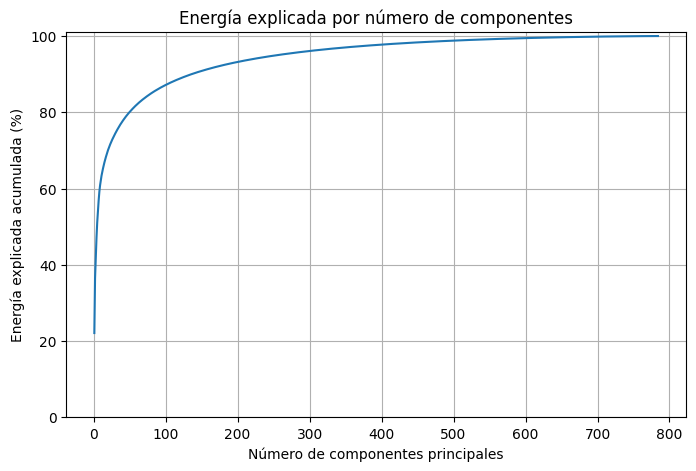

In [33]:
def plot_explained_variance(pca):
    """
    Dibuja el porcentaje acumulado de energía explicada por las componentes principales.
    """
    if pca.explained_variance_ is None:
        print("Error: PCA no ha sido entrenado. Llamá a fit() primero.")
        return

    # Normalizar autovalores para que sumen 1
    total_variance = np.sum(pca.explained_variance_)
    explained = pca.explained_variance_ / total_variance

    # Energía acumulada
    cumulative_explained = np.cumsum(explained)

    # Graficar
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(cumulative_explained)+1), cumulative_explained * 100)
    plt.xlabel("Número de componentes principales")
    plt.ylabel("Energía explicada acumulada (%)")
    plt.title("Energía explicada por número de componentes")
    plt.grid(True)
    plt.ylim(0, 101)
    plt.show()


# (5) Preprocesamiento para PCA
x_train_flat = x_train.reshape((x_train.shape[0], -1)).astype(np.float64)

# Crear e entrenar PCA
pca = PCA()
pca.fit(x_train_flat)

# Graficar varianza explicada
plot_explained_variance(pca)




Se puede observar en el gráfico la energía acumulada de acuerdo el número de componentes principales utilizadas, en el mismo se observa que:

- Utilizando aproximadamente 50 componentes principales, tenemos una energía acumulado del 80%.
- Utilizando aproximadamente 100 componentes principales, tenemos una energía acumulada del 90%, por lo que usar 100 componentes principales podría ser un buen compromiso entre compresión y fidelidad.

---

### **Evaluación del error de reconstrucción en función del número de componentes principales**

<p align=center>
    <img src="https://github.com/walteraguirre/TPS/blob/main/TP07/imagenes/ej_d.png?raw=true" alt="ej_a">
</p>

---

Para cuantificar la pérdida de información que introduce la reducción de dimensión con PCA, definimos la función `plot_reconstruction_error`, que calcula y dibuja el error cuadrático medio (ECM) de testeo al reconstruir los datos empleando desde 1 hasta $ k $ componentes principales.

La función recibe un objeto `PCA` ya entrenado, los datos de testeo `X_test`, y tambien puede recibir un parámetro `max_k` para indicarle la cantidad de componentes principales que queremos analizar. Para calcular el ECM, la función opera de la siguiente manera:

- Se fija el máximo de componentes $k$ a usar. Si no se especifíca el máximo número de componentes principales a emplear, se analiza el ECM desde k=1 hasta la cantidad total disponibles de componentes principales. Si se especifica `max_k`, se calcula el ECM desde k=1 hasta el mínimo entre `max_k` y el total de componentes principales disponibles.  


- Luego, para cada $ k = 1,\dots,K $ se realiza lo siguiente:

1. **Proyección y reconstrucción**  
   Usamos los primeros $ k $ vectores propios $ \mathbf{V}_k = [\,\mathbf{v}_1,\dots,\mathbf{v}_k\,] $.

   - **Proyección**:  
     $$
     \mathbf{U}_k = \mathbf{V}_k \; \mathbf{X}_{\text{test}}
     $$

   - **Reconstrucción**:  
     $$
     \hat{\mathbf{X}}_k = \mathbf{V}_k^T \; \mathbf{U}_k
     $$

   Gracias al parámetro `use_previous_results=True`, cada paso $ k+1 $ aprovecha la proyección y reconstrucción ya calculada para $ k $, evitando rehacer todo desde cero.

2. **Cálculo del ECM**  
   Definimos el error cuadrático medio para $ k $ componentes como:

   $$
   \mathrm{ECM}(k)
   = \frac{1}{N\,D}\;\left\|\mathbf{X}_{\text{test}} 
   - \hat{\mathbf{X}}_k\right\|^{2}
   = \frac{1}{N\,D}\sum_{i=1}^{N}\sum_{j=1}^{D}
   \left(x_{ij} - \hat{x}_{ij}^{(k)}\right)^{2}
   $$

   donde $ N $ es el número de muestras y $ D $ la dimensión original (número de píxeles en este caso).


- Finalmente, se grafica la curva de ECM en función de las componentes principales empleadas. 


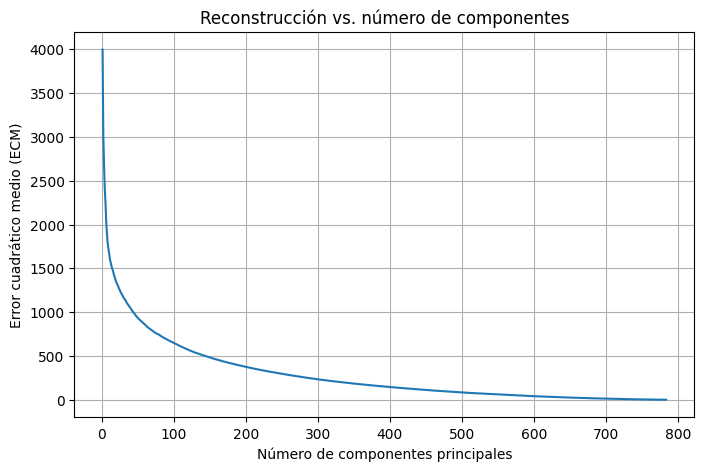

In [34]:
def plot_reconstruction_error(pca, X_test, max_k=None):
    """
    Grafica el error cuadrático medio (ECM) de reconstrucción
    en función del número de componentes principales.

    Si no se especifica max_k, se usan todas las componentes.
    """
    if pca.components_ is None:
        print("Error: PCA no ha sido entrenado. Llamá a fit() primero.")
        return

    total_components = pca.components_.shape[1]
    
    #si no especifica max_k, utilizamos todas las componentes
    if max_k is None:
        max_k = total_components
    else:
        max_k = min(max_k, total_components)

    errors = []

    for k in range(1, max_k + 1):
        X_hat = pca.transform_reconstruction(X_test, k, use_previous_results=True)

        mse = np.mean((X_test - X_hat) ** 2)
        errors.append(mse)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), errors)
    plt.xlabel("Número de componentes principales")
    plt.ylabel("Error cuadrático medio (ECM)")
    plt.title("Reconstrucción vs. número de componentes")
    plt.grid(True)
    plt.show()


x_test_flat = x_test.reshape((x_test.shape[0], -1)).astype(np.float64)
plot_reconstruction_error(pca, x_test_flat)


El gráfico muestra cómo varía el error cuadrático medio (ECM) de reconstrucción a medida que se incrementa el número de componentes principales k utilizados en PCA.

En el mismo se observa que:

- El error disminuye rapidamente con las primeras componentes. 
- Más o menos a partir de k=100, el error empieza a decrecer más lento, por lo que relacionando con el gráfico anterior, podemos decir que las primeras 100 componentes principales capturan la mayor parte de la información relevante.
- A medida que se van agregando más componentes principales, el error va tendiendo a 0.

---

### **Visualización de reconstrucciones con diferentes cantidades de componentes principales**

<p align=center>
    <img src="https://github.com/walteraguirre/TPS/blob/main/TP07/imagenes/ej_e.png?raw=true" alt="ej_e">
</p>

---

La función `mostrar_reconstrucciones` permite analizar visualmente el efecto de la **reducción de dimensionalidad mediante PCA** sobre un conjunto de imágenes. En particular, se observa cómo varía la calidad de reconstrucción de las imágenes a medida que se incrementa el número de componentes principales utilizadas.

La función opera de la siguiente manera:

1. **Selección de imágenes**  
   - Se seleccionan aleatoriamente 10 imágenes del conjunto de test `X_test`.
   - Para ello se utiliza `np.random.seed()` para garantizar aleatoriedad reproducible si se desea.

2. **Reconstrucción con distintas cantidades de componentes principales**  
   - Para cada imagen, se reconstruyen tres versiones utilizando:
     - **1 componente principal**: compresión extrema.
     - **100 componentes**: compresión moderada.
     - **784 componentes**: reconstrucción sin pérdida (todas las componentes).
   - Además, se incluye la imagen original como referencia.

   En PCA, una imagen $ \mathbf{x} \in \mathbb{R}^{d} $ se proyecta a un subespacio de dimensión menor $ k $, y luego se reconstruye. Al incrementar $ k $, se conservan más dimensiones del espacio original, lo que mejora la reconstrucción.


3. **Visualización comparativa**  
   - Las imágenes se organizan en una grilla de **10 filas × 4 columnas**:
     - Cada fila corresponde a una imagen diferente.
     - Las columnas muestran: **original**, reconstrucción con **1**, **100** y **784** componentes, respectivamente.
   - Esto permite observar visualmente el impacto de la compresión.





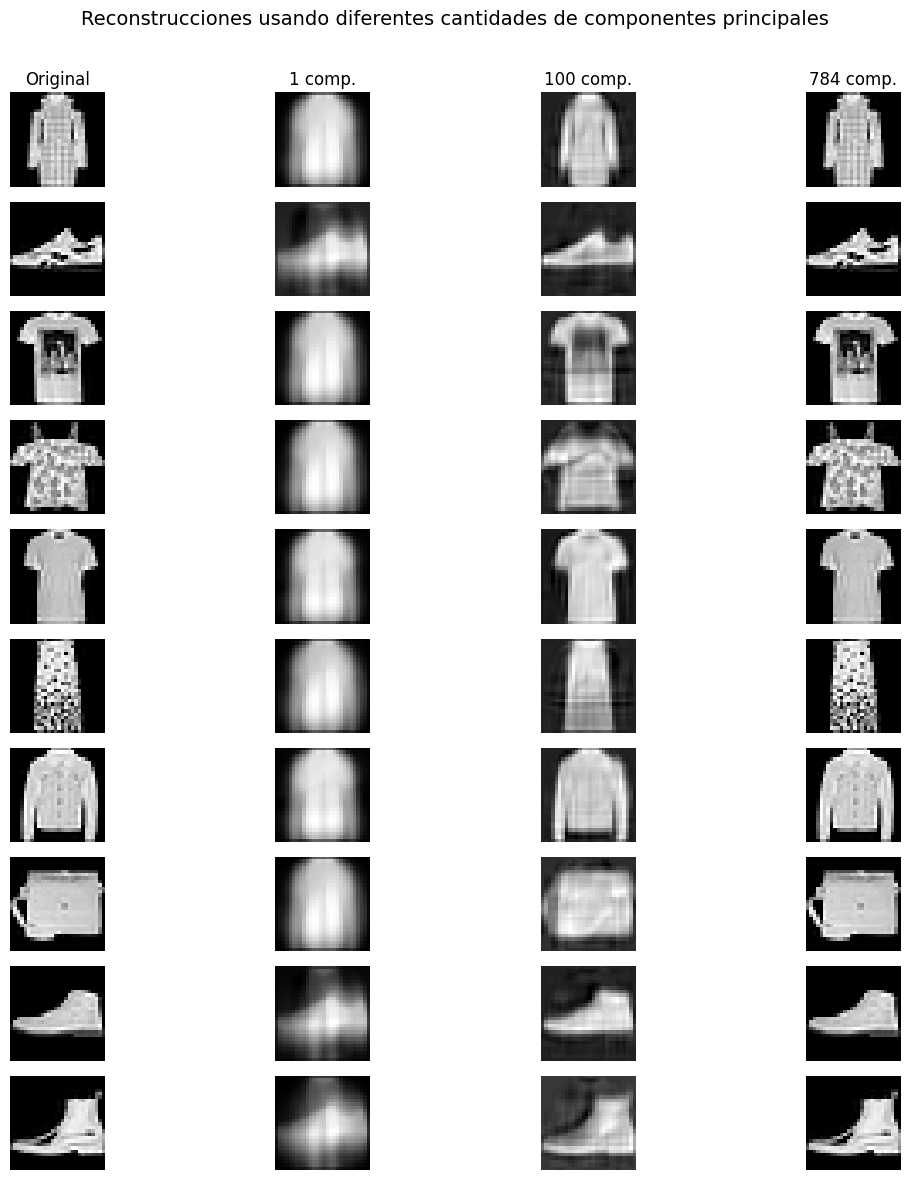

In [35]:
def mostrar_reconstrucciones(pca, X_test):
    """
    Muestra 10 imágenes del conjunto de test:
    - Primera columna: imágenes originales
    - Siguientes columnas: reconstrucciones con 1, 100 y 784 componentes.

    Parámetros:
    - pca: instancia de la clase PCA ya entrenada
    - X_test: matriz de imágenes de testeo de forma (N, 784)
    """
    np.random.seed()
    idx = np.random.choice(X_test.shape[0], size=10, replace=False)
    imgs_orig = X_test[idx]

    ks = [0, 1, 100, 784]  # 0 es la imagen original
    fig, axes = plt.subplots(10, len(ks), figsize=(12, 12))
    fig.suptitle("Reconstrucciones usando diferentes cantidades de componentes principales", fontsize=14)

    for i, img in enumerate(imgs_orig):
        for j, k in enumerate(ks):
            if k == 0:
                img_to_show = img  # Imagen original
            else:
                img_to_show = pca.transform_reconstruction(img.reshape(1, -1), k).reshape(-1)
            axes[i, j].imshow(img_to_show.reshape(28, 28), cmap='gray')
            axes[i, j].axis('off')
            if i == 0:
                if k == 0:
                    axes[i, j].set_title("Original")
                else:
                    axes[i, j].set_title(f"{k} comp.")

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

mostrar_reconstrucciones(pca, x_test)

Se puede observar en el gráfico:

- En la primer columna a la izquierda, se observan las imágenes originales.
- En la segunda columna se observan las reconstrucciones utilizando una sola componente principal. Podemos ver que con k=1 no se puede obtener una reconstrucción fiel a la imágen original.
- En la tercera columna se observan las reconstrucciones utilizando k=100 y se observa que ya se obtienen reconstrucciones más fieles a las imágenes originales. Esto se debe que a que anteriormente demostramos que con k=100 tenemos un 90% de energía acumulada.
- En la última columna se observan las reconstrucciones con k=784 y como estamos utilizando todas las componentes principales, tenemos una recontrucción perfecta.

---

### **Evaluación del desempeño del modelo PCA como detector de anomalías**


<p align=center>
    <img src="https://github.com/walteraguirre/TPS/blob/main/TP07/imagenes/ej_f.png?raw=true" alt="ej_f">
</p>

---

En esta etapa se busca utilizar el modelo PCA no solo para compresión y reconstrucción, sino también como una herramienta para detectar anomalías. Para ello, se construye una nueva base de datos que mezcla imágenes del conjunto original con imágenes de una fuente distinta, en este caso son las imágenes de testeo del dataset MNIST, con el objetivo de que estas últimas funcionen como "anómalas".

En este contexto, se considera **anomalía** a cualquier imagen que no pertenezca al mismo tipo de datos con el que se entrenó el modelo PCA. 

El código funciona de la siguiente manera:

1. **Carga del conjunto de anomalías**
   - Se utiliza la función `tensorflow.keras.datasets.mnist.load_data()` para cargar las imágenes de dígitos manuscritos del dataset MNIST.
   - Las imágenes se transforman a vectores de dimensión $784 = 28 \times 28$, y se convierten a tipo `float32`.


2. **Combinación de los conjuntos**
   - Se apilan ambos conjuntos de datos en una sola matriz `X_anomaly_test`, que contiene tanto imágenes "normales" (clase 0) como "anómalas" (clase 1).
   - Se crea un vector de etiquetas `y_anomaly_test` con ceros para las imágenes normales y unos para las anómalas.

4. **Mezcla aleatoria**
   - Se mezclan los índices de los datos de manera aleatoria para evitar que las clases estén agrupadas en el tiempo de evaluación.

Este conjunto nos permitirá evaluar el rendimiento del modelo PCA como detector de anomalías.

In [36]:
# Cargar MNIST (dígitos)
(_, _), (X_mnist_test, _) = mnist.load_data()
X_mnist_test = X_mnist_test.reshape(-1, 784).astype(np.float64)

# Combinar
X_anomaly_test = np.vstack([x_test_flat, X_mnist_test])
y_anomaly_test = np.array([0]*len(x_test) + [1]*len(X_mnist_test))

# Mezclar
indices = np.arange(len(y_anomaly_test))
np.random.seed(85)
np.random.shuffle(indices)

X_anomaly_test = X_anomaly_test[indices]
y_anomaly_test = y_anomaly_test[indices]





### **Detección de anomalías con PCA y curvas ROC**

<p align=center>
    <img src="https://github.com/walteraguirre/TPS/blob/main/TP07/imagenes/ej_g.png?raw=true" alt="ej_g">
</p>

---

El objetivo de esta sección es evaluar el uso de PCA como detector de anomalías a partir del error cuadrático medio (ECM) de reconstrucción. Cuanto mayor sea el ECM de una muestra reconstruida, mayor es la probabilidad de que esa muestra sea una anomalía (es decir, un dato fuera de distribución).

Para implementar el detector de anomalías procedemos de la siguiente manera:

1. **Entrenamiento del modelo PCA**
   - El modelo PCA debe estar entrenado utilizando solo imágenes normales del conjunto de entrenamiento (`x_train`), que corresponden a Fashion-MNIST.

2. **Reconstrucción con distintos valores de $k$**
   - Se evalúan tres configuraciones del modelo PCA usando 1, 100 y 784 componentes principales.
   - Para cada valor de $k$, se realiza la reconstrucción de las imágenes del conjunto combinado `X_anomaly_test` (que contiene tanto datos normales como anómalos).

3. **Cálculo del error cuadrático medio (ECM)**
   - Se calcula el ECM por muestra, es decir, el promedio del cuadrado de las diferencias entre la imagen original y la reconstruida.
   - El ECM se utiliza como puntuación de anomalía: cuanto más alto, más anómala se considera una muestra.

4. **Construcción de la curva ROC**
   - Se genera la curva ROC comparando las etiquetas verdaderas (`y_anomaly_test`, donde 0 = normal, 1 = anomalía) contra los valores de ECM.
   - Se calcula el **Área bajo la curva (AUC)** como medida del rendimiento del detector para cada valor de $k$.

5. **Visualización**
   - Se grafican las curvas ROC para cada valor de $k$.
   - También se dibuja una línea diagonal que representa el rendimiento del azar (AUC = 0.5), usada como referencia.



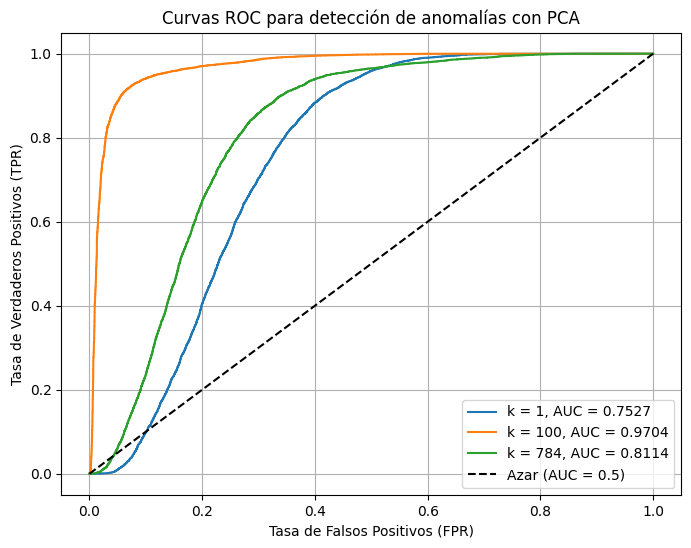

In [37]:
# Valores de k a evaluar
k_values = [1, 100, 784]
plt.figure(figsize=(8, 6))

for k in k_values:
    # Reconstrucción
    X_hat = pca.transform_reconstruction(X_anomaly_test, k, use_previous_results=False)

    # Error cuadrático medio por muestra (no promedio)
    ecm = np.mean((X_anomaly_test - X_hat) ** 2, axis=1)

    # Etiquetas: 0 = normal, 1 = anomalía
    fpr, tpr, thresholds = roc_curve(y_anomaly_test, ecm)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'k = {k}, AUC = {roc_auc:.4f}')

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para detección de anomalías con PCA')
plt.legend()
plt.grid(True)
plt.show()


El gráfico muestra las curvas ROC obtenidas para distintos valores del número de componentes principales k, utilizadas en la reconstrucción de imágenes con PCA para detectar anomalías. En el mismo podemos observar:

- En naranja la curva ROC utilizando k=100 componentes principales. Utilizando 100 componentes principales se obtiene el mejor desempeño, podemos decir que se logra una reconstrucción precisa para datos normales y que las anomalías se reconstruyen peor, por lo que se tiene un ECM alto y es fácil detectar la anomalía.

- En azul la curva ROC utilizando k=1 componentes principales. Con una sola componente principal tenemos el peor desempeño ya que tenemos una reconstrucción pobre para datos normales y el error no discrimina bien entre normales y anómalos.

- En verde tenemos la curva ROC utilizando k=784 componentes principales. En este caso se utilizan todas las componentes por lo tanto normales como anomalías se reconstruyen bien, el error es bajo para todos los datos por lo que se pierde capacidad de detección.

- En línea punteada negra se observa el desempeño de un clasificador aleatorio. 

